## Heart Failure 

 #### prediction of Heart_failure 

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Importing the Dataset

In [2]:
hf = pd.read_csv(r"C:\Users\Chani\Documents\Decodr\sample data\data.csv")

In [3]:
hf.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


### For printing more number of rows / columns at a time

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [5]:
hf.tail(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
289,90.0,1,337,0,38,0,390000.0,0.9,144,0,0,256,0
290,45.0,0,615,1,55,0,222000.0,0.8,141,0,0,257,0
291,60.0,0,320,0,35,0,133000.0,1.4,139,1,0,258,0
292,52.0,0,190,1,38,0,382000.0,1.0,140,1,1,258,0
293,63.0,1,103,1,35,0,179000.0,0.9,136,1,1,270,0
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [6]:
hf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### hf dataset columns contain all numeric data type( int / float) .

In [7]:
hf.shape

(299, 13)

In [8]:
hf.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT'], dtype='object')

### Finding Missing values

In [9]:
hf.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

#### No null values

In [10]:
(hf.isnull().sum()/hf.shape[0])*100

age                         0.0
anaemia                     0.0
creatinine_phosphokinase    0.0
diabetes                    0.0
ejection_fraction           0.0
high_blood_pressure         0.0
platelets                   0.0
serum_creatinine            0.0
serum_sodium                0.0
sex                         0.0
smoking                     0.0
time                        0.0
DEATH_EVENT                 0.0
dtype: float64

#### Which gives percentage of null values column-wise

### Duplicates

In [11]:
hf.duplicated().sum()

0

## Description of Dataset

In [12]:
hf.describe(include = "all")

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [13]:
hf.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


 ### EDA

### Visualization

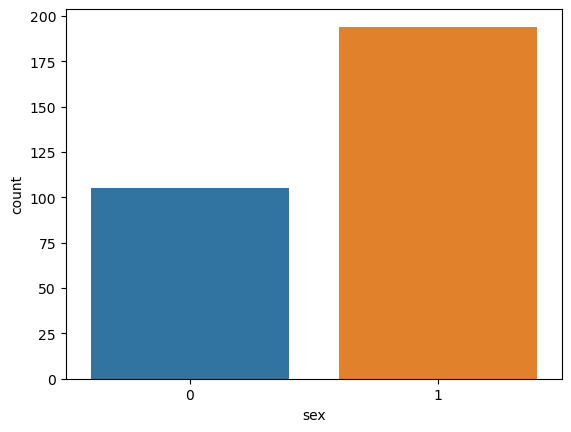

In [14]:
sns.countplot(data = hf, x = "sex")
plt.show()

#### " 0 " are the female and " 1 "  are the male. From this plot male patient are faced or registerd more heart_failure cases

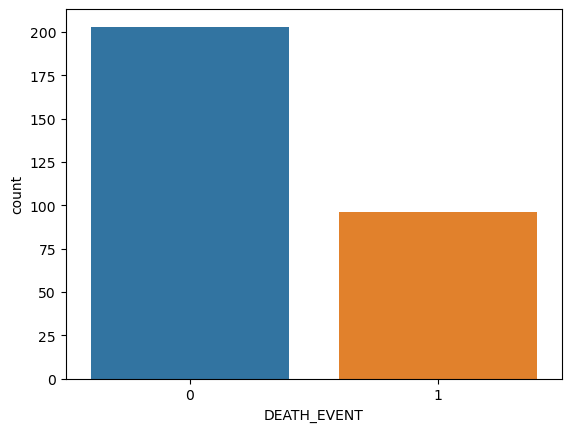

In [15]:
sns.countplot(data = hf, x = "DEATH_EVENT")
plt.show()

In [16]:
hf["DEATH_EVENT"].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

####  From this plot female patient are registerd / died more than male patient

### Finding Outliers

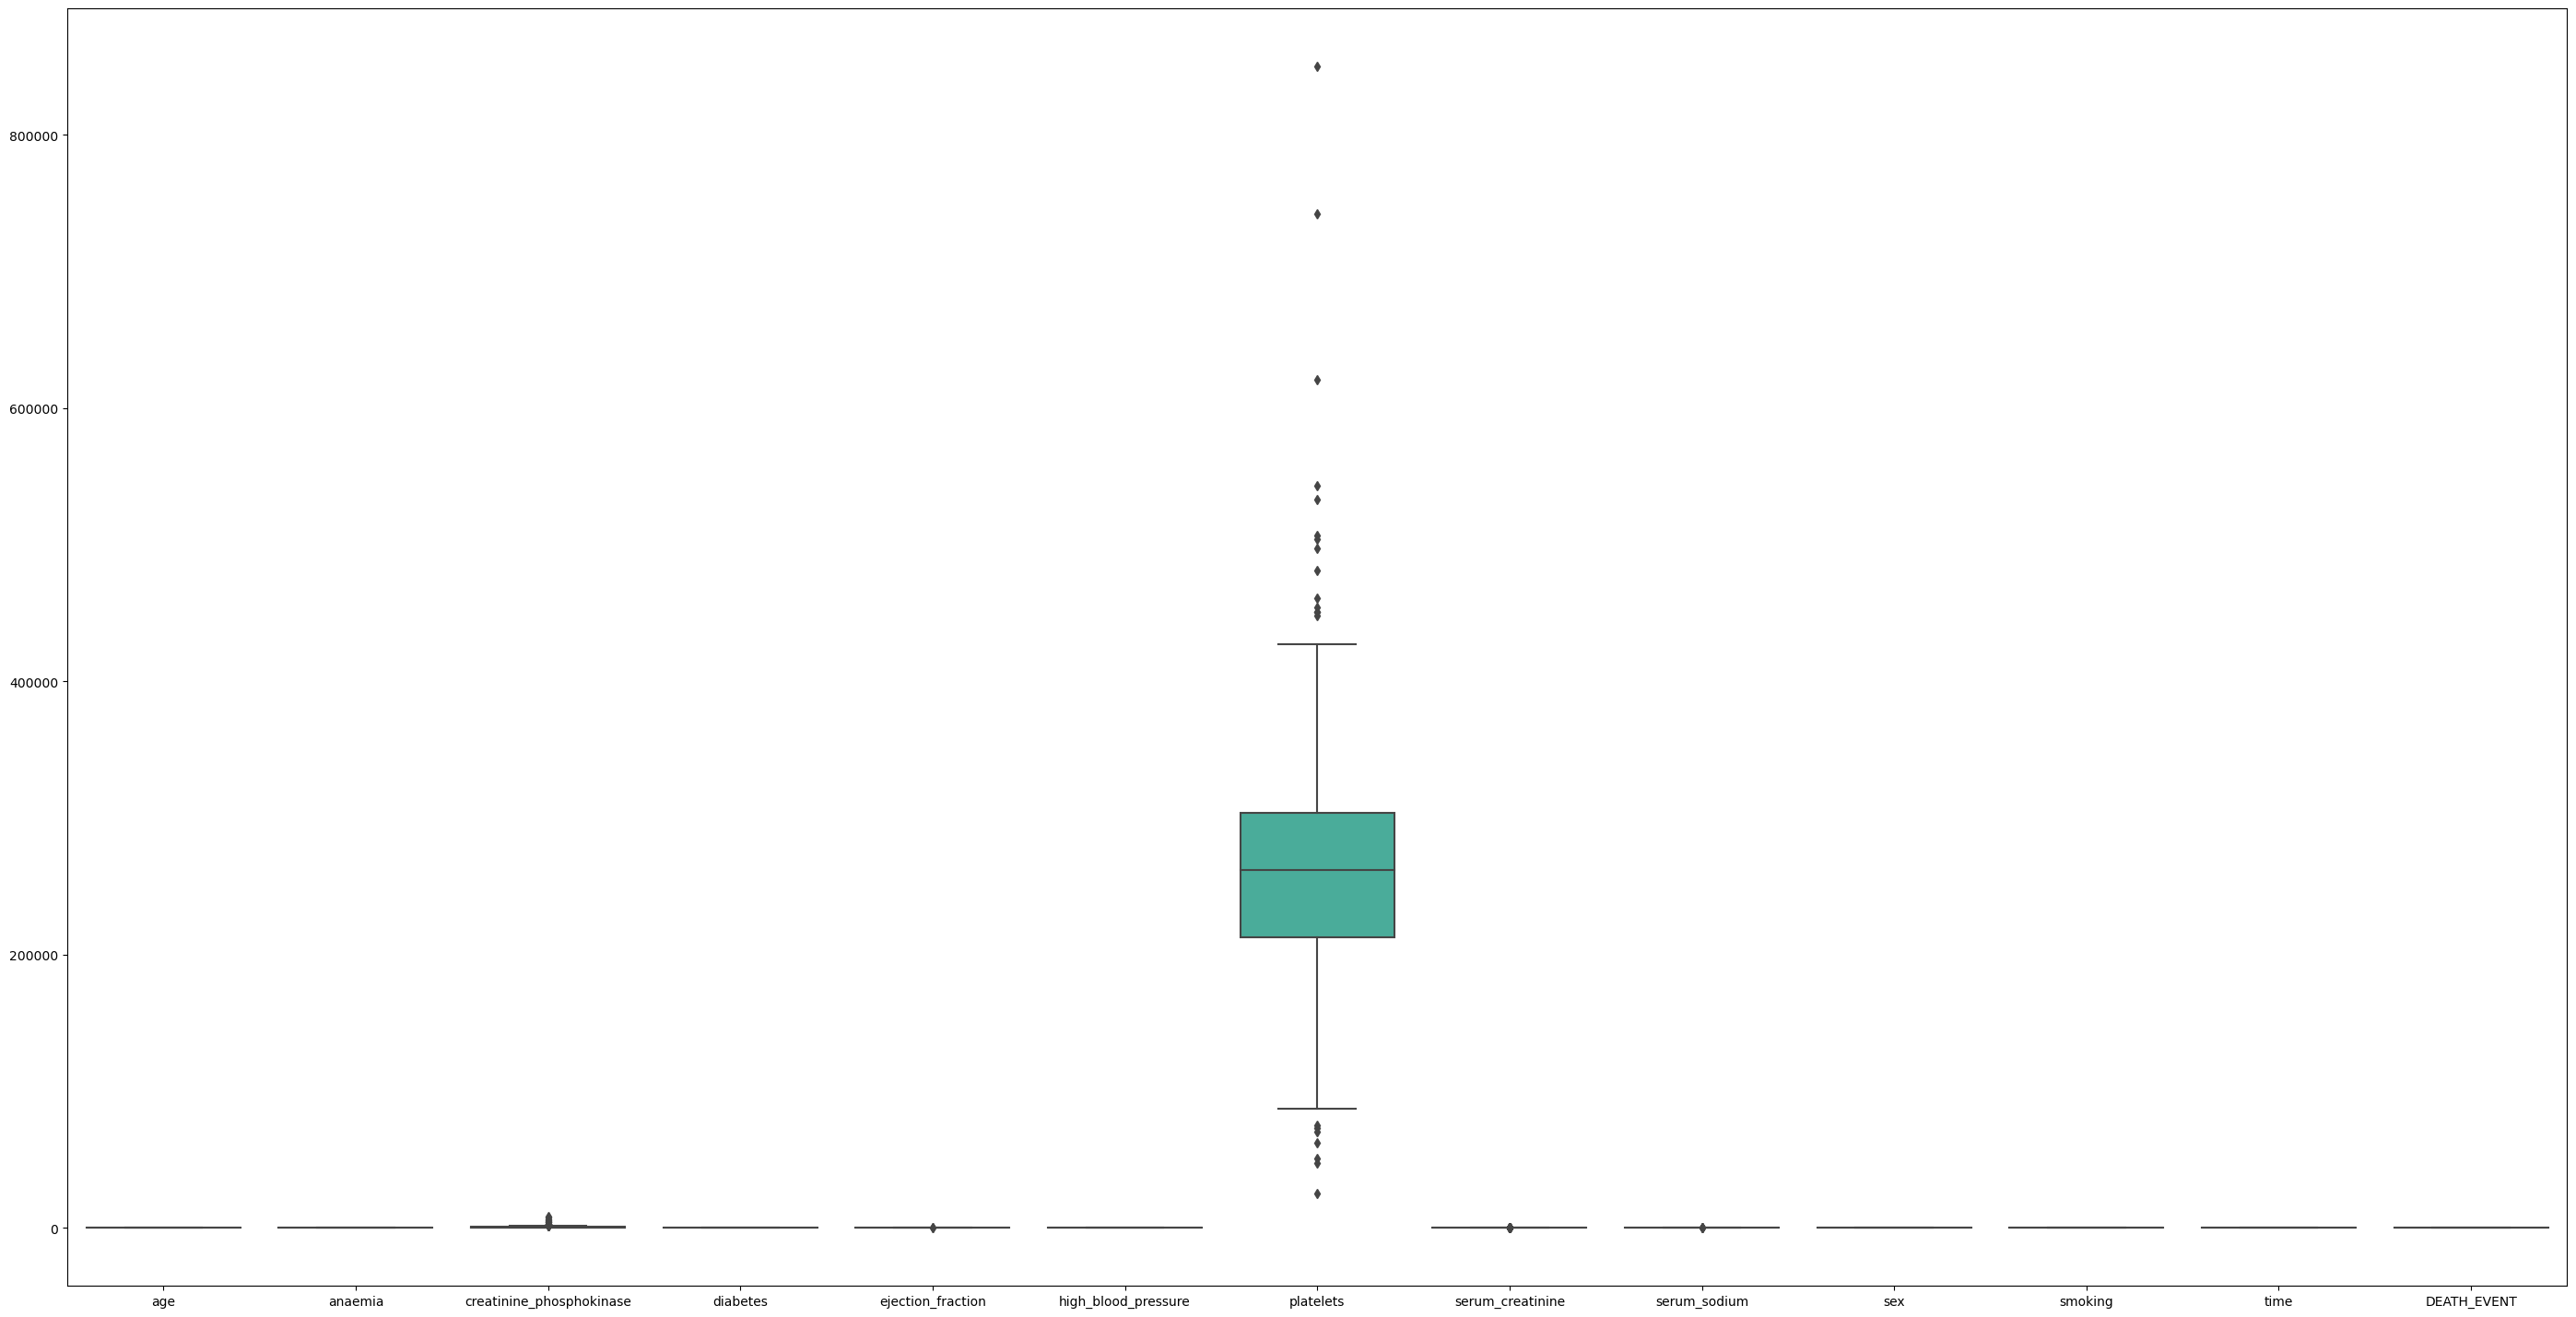

In [17]:
plt.figure(figsize=(35,18))
sns.boxplot(data=hf)
plt.show()

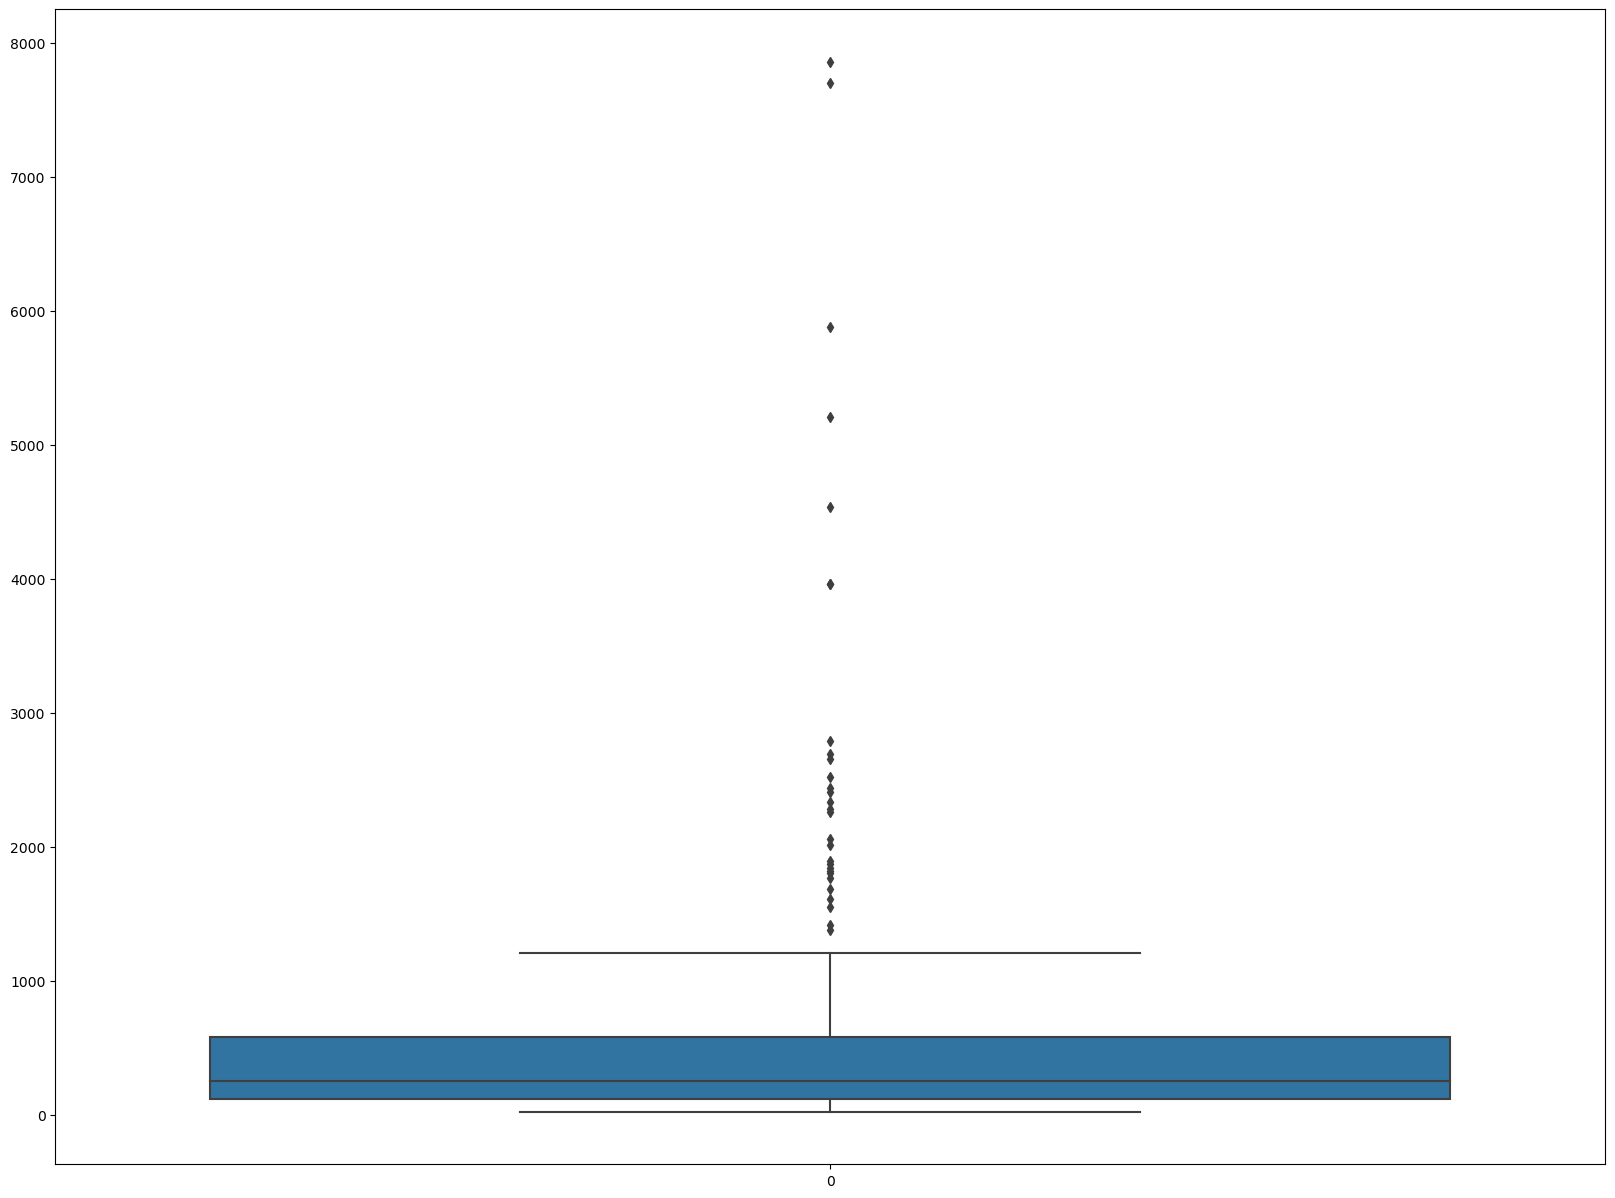

In [18]:
plt.figure(figsize = (20,15))
sns.boxplot(data=hf.creatinine_phosphokinase)
plt.show()

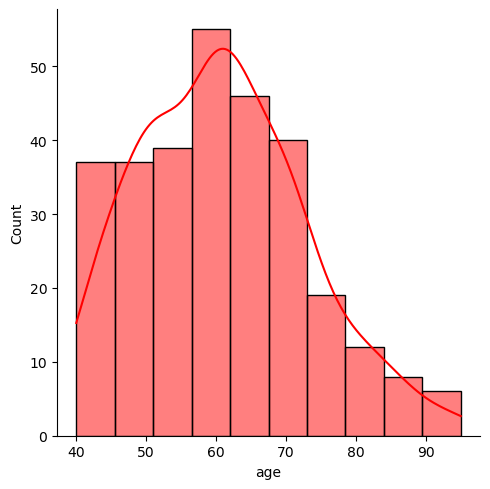

In [19]:
sns.displot(hf["age"],kde = True, color = "red", label = "Total")
plt.show()

<ipython-input-20-64b5129a0ec6>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_survived = male[hf['DEATH_EVENT'] == 1]
<ipython-input-20-64b5129a0ec6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_unsurvived = male[hf['DEATH_EVENT'] == 0]
<ipython-input-20-64b5129a0ec6>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_survived = female[hf['DEATH_EVENT'] == 1]
<ipython-input-20-64b5129a0ec6>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_unsurvived = female[hf['DEATH_EVENT'] == 0]


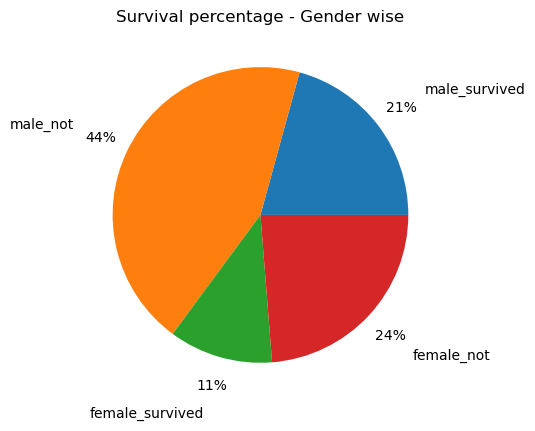

In [20]:
male = hf[hf['sex'] == 1]
female = hf[hf['sex'] == 0]
male_survived = male[hf['DEATH_EVENT'] == 1]
male_unsurvived = male[hf['DEATH_EVENT'] == 0]
female_survived = female[hf['DEATH_EVENT'] == 1]
female_unsurvived = female[hf['DEATH_EVENT'] == 0]
labels = ['male_survived','male_not','female_survived','female_not']
feature = [len(male_survived),len(male_unsurvived),len(female_survived),len(female_unsurvived)]
plt.pie(feature,labels=labels,autopct='%.0f%%',startangle=0,pctdistance=1.2,labeldistance=1.4)
plt.title("Survival percentage - Gender wise")
plt.show()

<ipython-input-21-6d8e38a7eb44>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr,dtype=np.bool)


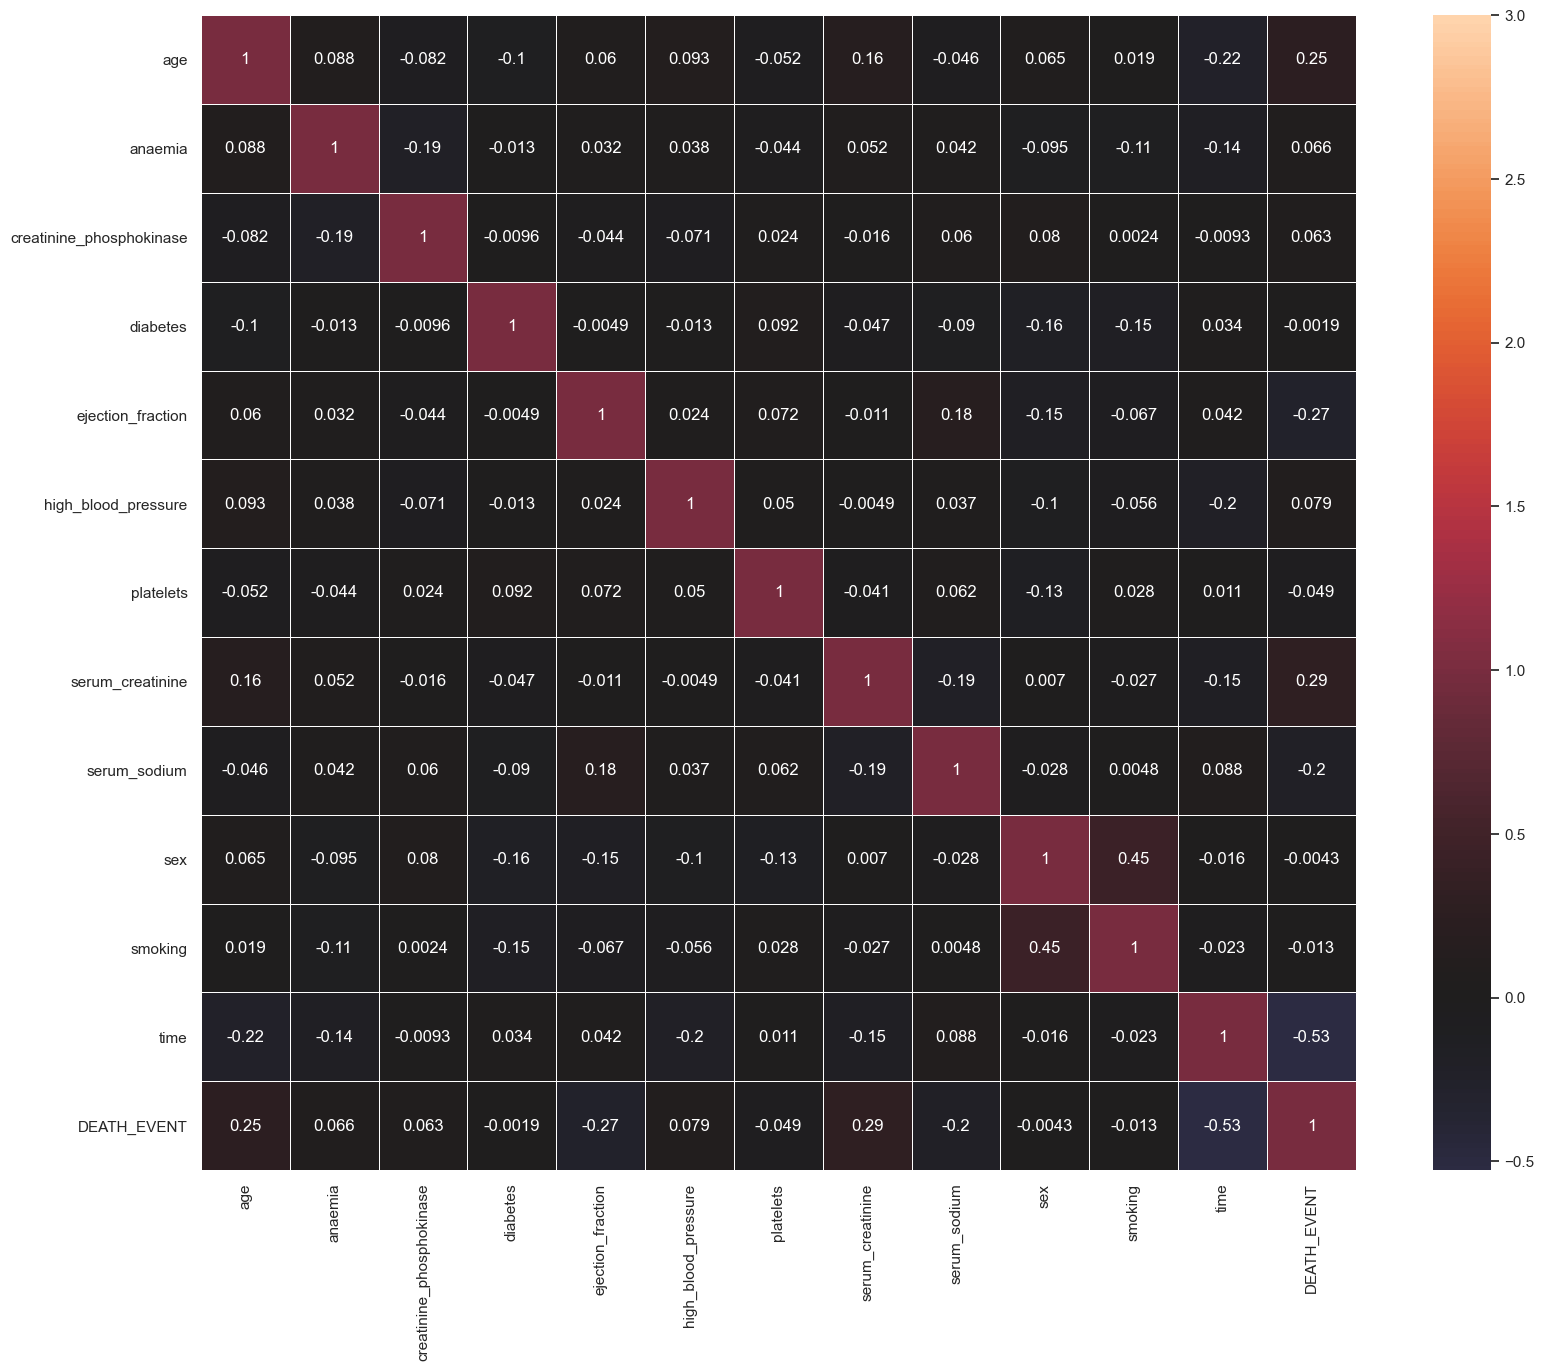

In [21]:
plt.figure(figsize=(20,15))
sns.set(style="dark")
corr = hf.corr()
mask = np.zeros_like(corr,dtype=np.bool)
sns.heatmap(corr,mask=mask,vmax=3,center=0,square=True,linewidths=0.5,annot=True)
plt.show()

 ### Feature Importance

In [22]:
from sklearn.ensemble import ExtraTreesClassifier

[0.09476202 0.02391427 0.07056094 0.03110281 0.12668101 0.0220958
 0.06730082 0.12430637 0.08769639 0.02819577 0.02669912 0.29668468]


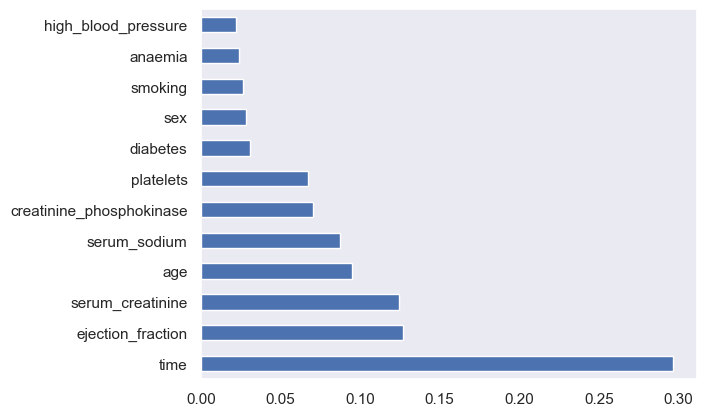

In [25]:
x = hf.drop(columns = "DEATH_EVENT")
y = hf["DEATH_EVENT"]
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)
Feature_importances = pd.Series(model.feature_importances_, index=x.columns)
Feature_importances.nlargest(12).plot(kind='barh')
plt.show()

### We considering only 6 columns which are most dependent on the targetd column

In [26]:
Feature_importances*100

age                          9.476202
anaemia                      2.391427
creatinine_phosphokinase     7.056094
diabetes                     3.110281
ejection_fraction           12.668101
high_blood_pressure          2.209580
platelets                    6.730082
serum_creatinine            12.430637
serum_sodium                 8.769639
sex                          2.819577
smoking                      2.669912
time                        29.668468
dtype: float64

#### 'time', 'ejection_fraction', 'serum_creatinine', 'age', 'serum_sodium', 'creatinine_phosphokinase '

In [27]:
sum(Feature_importances.nlargest(6))

0.8006914097938623

## Splitting and Feature Scaling of a dataset

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [29]:
Features = ['time','ejection_fraction','serum_creatinine','age','diabetes']
X = hf[Features]
data_1 = hf.iloc[:,[0,2,4,7,8,11]]
data_2 = hf[["DEATH_EVENT"]]

#### Splitting Data

In [30]:
X_train, X_test, y_train, y_test = train_test_split(data_1,data_2, test_size=0.2, random_state=0)


### Scaling

In [31]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
print("X_train Shape : ", X_train.shape)
print("X_test Shape  : ", X_test.shape)
print("y_train Shape : ", y_train.shape)
print("y_test Shape  : ", y_test.shape)

X_train Shape :  (239, 6)
X_test Shape  :  (60, 6)
y_train Shape :  (239, 1)
y_test Shape  :  (60, 1)


### Model_fitting

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import r2_score, roc_auc_score, roc_curve, classification_report

In [36]:
accuracy_list=[]
models=[]
def model_fit(X,y,algorithm,gridSearchParams,cv):
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
  grid = GridSearchCV(estimator = algorithm,param_grid=gridSearchParams,cv=cv,scoring="accuracy",verbose=1,n_jobs=-1)
  gridresult = grid.fit(X_train,y_train)
  best_params = gridresult.best_params_
  pred = gridresult.predict(X_test)
  print("Classification Report :", classification_report(y_test,pred))
  model_acc = accuracy_score(y_test,pred)
  accuracy_list.append(100*model_acc)

## RandomForest

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [42]:
Features = ['time','ejection_fraction','serum_creatinine','age','diabetes']
X = hf[Features]

In [43]:
param = {
    'n_estimators':[100,500,1000,2000] , }
model_fit(X,y,RandomForestClassifier(),param,cv=5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Classification Report :               precision    recall  f1-score   support

           0       0.91      0.95      0.93        43
           1       0.87      0.76      0.81        17

    accuracy                           0.90        60
   macro avg       0.89      0.86      0.87        60
weighted avg       0.90      0.90      0.90        60



## Decision Tree

In [44]:
clf_1 = DecisionTreeClassifier(random_state=0)
clf_1.fit(X_train, y_train)
y_pred = clf_1.predict(X_test)

print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('Decision Tree Classifier f1-score      : {:.4f}'.format(f1_score( y_test , y_pred)))
print('Decision Tree Classifier precision     : {:.4f}'.format(precision_score(y_test, y_pred)))
print('Decision Tree Classifier recall        : {:.4f}'.format(recall_score(y_test, y_pred)))
print("Decision Tree Classifier roc auc score : {:.4f}".format(roc_auc_score(y_test,y_pred)))
print("\n",classification_report(y_pred, y_test))

Accuracy Score: 0.7333
Decision Tree Classifier f1-score      : 0.6190
Decision Tree Classifier precision     : 0.6842
Decision Tree Classifier recall        : 0.5652
Decision Tree Classifier roc auc score : 0.7015

               precision    recall  f1-score   support

           0       0.84      0.76      0.79        41
           1       0.57      0.68      0.62        19

    accuracy                           0.73        60
   macro avg       0.70      0.72      0.71        60
weighted avg       0.75      0.73      0.74        60



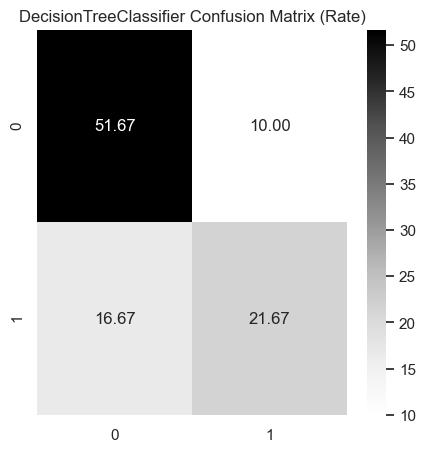

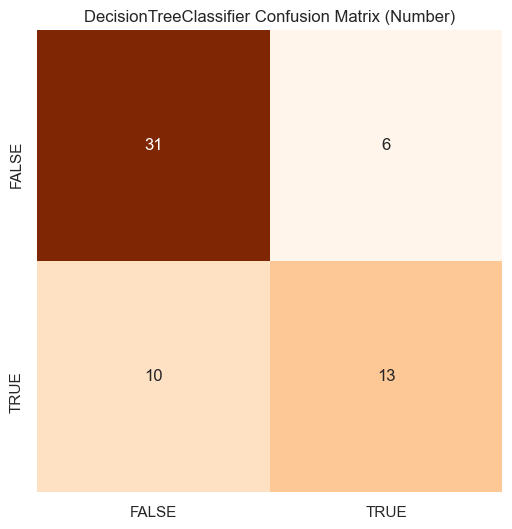

In [45]:
plt.figure(figsize=(5,5))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap((cf_matrix / np.sum(cf_matrix)*100), annot = True, fmt=".2f", cmap="Greys")
plt.title("DecisionTreeClassifier Confusion Matrix (Rate)")
plt.show()

cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap="Oranges",
            xticklabels=["FALSE","TRUE"],
            yticklabels=["FALSE","TRUE"],
            cbar=False)
plt.title("DecisionTreeClassifier Confusion Matrix (Number)")
plt.show()

### Hyperparameter tuning using GridSearchCV

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
param_grid = {
    "max_depth": np.arange(1,10),
    "min_samples_split": [0.001, 0.01, 0.1, 0.2, 0.02, 0.002],
    "criterion": ["gini", "entropy", None],
    "max_leaf_nodes": np.arange(1,10),
    "class_weight": ["balanced", None]
}

clf_2 = DecisionTreeClassifier()
grid = GridSearchCV(clf_2, param_grid, n_jobs=-1, verbose=2, cv=10)
grid.fit(X_train, y_train)
grid.best_params_

Fitting 10 folds for each of 2916 candidates, totalling 29160 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan ... nan nan nan]
  warnings.warn(


{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 1,
 'max_leaf_nodes': 2,
 'min_samples_split': 0.001}

### Implementing Hyper-parameters

Accuracy Score: 0.8167
Decision Tree Classifier f1-score      : 0.7179
Decision Tree Classifier precision     : 0.8750
Decision Tree Classifier recall        : 0.6087
Decision Tree Classifier roc auc score : 0.7773

               precision    recall  f1-score   support

           0       0.95      0.80      0.86        44
           1       0.61      0.88      0.72        16

    accuracy                           0.82        60
   macro avg       0.78      0.84      0.79        60
weighted avg       0.86      0.82      0.83        60



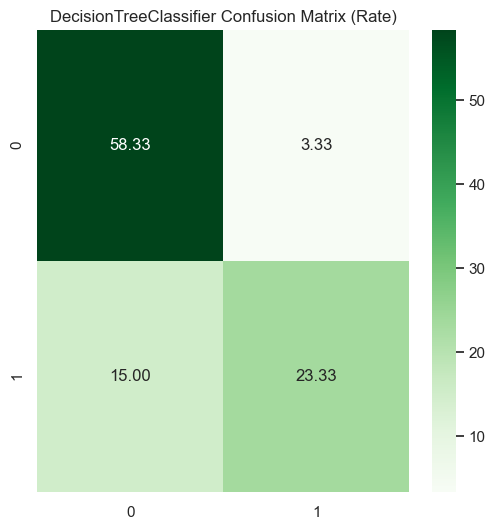

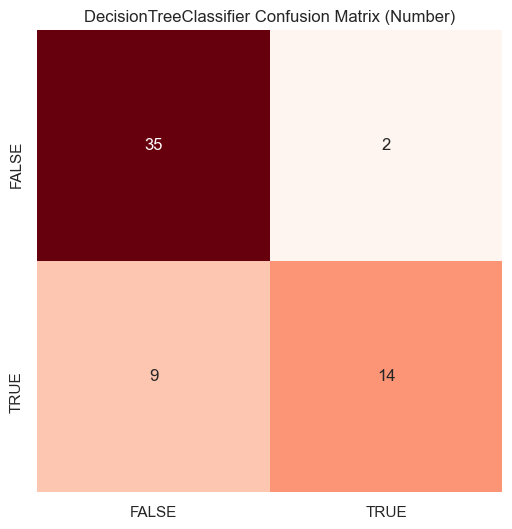

In [48]:
clf_2 = DecisionTreeClassifier(
    class_weight='balanced',
    criterion='gini',
    max_depth=1,
    max_leaf_nodes=2,
    min_samples_split=0.001,
    random_state=0
)
clf_2.fit(X_train, y_train)
y_pred = clf_2.predict(X_test)
    
print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('Decision Tree Classifier f1-score      : {:.4f}'.format(f1_score( y_test , y_pred)))
print('Decision Tree Classifier precision     : {:.4f}'.format(precision_score(y_test, y_pred)))
print('Decision Tree Classifier recall        : {:.4f}'.format(recall_score(y_test, y_pred)))
print("Decision Tree Classifier roc auc score : {:.4f}".format(roc_auc_score(y_test,y_pred)))
print("\n",classification_report(y_pred, y_test))
    
plt.figure(figsize=(6,6))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap((cf_matrix / np.sum(cf_matrix)*100), annot = True, fmt=".2f", cmap="Greens")
plt.title("DecisionTreeClassifier Confusion Matrix (Rate)")
plt.show()

cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap="Reds",
            xticklabels=["FALSE","TRUE"],
            yticklabels=["FALSE","TRUE"],
            cbar=False)
plt.title("DecisionTreeClassifier Confusion Matrix (Number)")
plt.show()

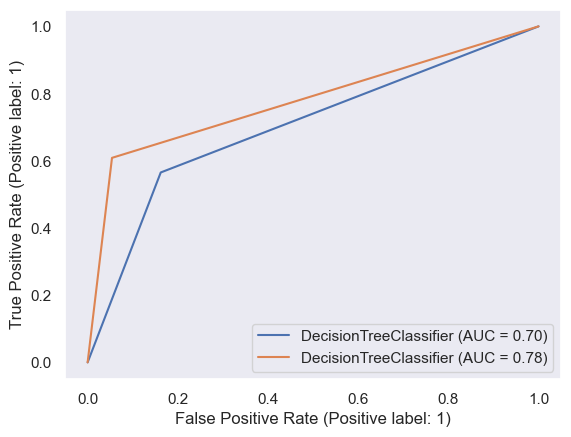

In [49]:
from sklearn.metrics import plot_roc_curve
fig = plot_roc_curve(clf_1, X_test, y_test)
fig = plot_roc_curve(clf_2, X_test, y_test, ax = fig.ax_)
plt.show()


### SVM (Support Vector Machine)

In [50]:
from sklearn.svm import SVC

In [51]:
param = {
    'C':[0.1,1,10,100],
    'gamma':[1,0.1,0.01,0.001,0.0001],
}
model_fit(X,y,SVC(),param,cv=5)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Classification Report :               precision    recall  f1-score   support

           0       0.90      1.00      0.95        43
           1       1.00      0.71      0.83        17

    accuracy                           0.92        60
   macro avg       0.95      0.85      0.89        60
weighted avg       0.93      0.92      0.91        60



## KNN 

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
params = {'n_neighbors':[4,5,6,7],
              'leaf_size':[1,3,5],
              'algorithm':['auto', 'kd_tree'],
              'n_jobs':[-1]}
model_fit(X,y,KNeighborsClassifier(),params,cv=5)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Classification Report :               precision    recall  f1-score   support

           0       0.89      0.98      0.93        43
           1       0.92      0.71      0.80        17

    accuracy                           0.90        60
   macro avg       0.91      0.84      0.87        60
weighted avg       0.90      0.90      0.90        60



## Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
penalty = ['l1','l2']
C = np.logspace(0,4,10)
hyperparameters = dict(C=C,penalty=penalty)
model_fit(X,y,LogisticRegression(),hyperparameters,cv=5)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Classification Report :               precision    recall  f1-score   support

           0       0.91      0.93      0.92        43
           1       0.81      0.76      0.79        17

    accuracy                           0.88        60
   macro avg       0.86      0.85      0.85        60
weighted avg       0.88      0.88      0.88        60



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.82845745        nan 0.82845745        nan 0.82845745
        nan 0.82845745        nan 0.82845745        nan 0.82845745
        nan 0.82845745        nan 0.82845745        nan 0.82845745
        nan 0.82845745]
  warnings.warn(


## Comparison of all Models

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

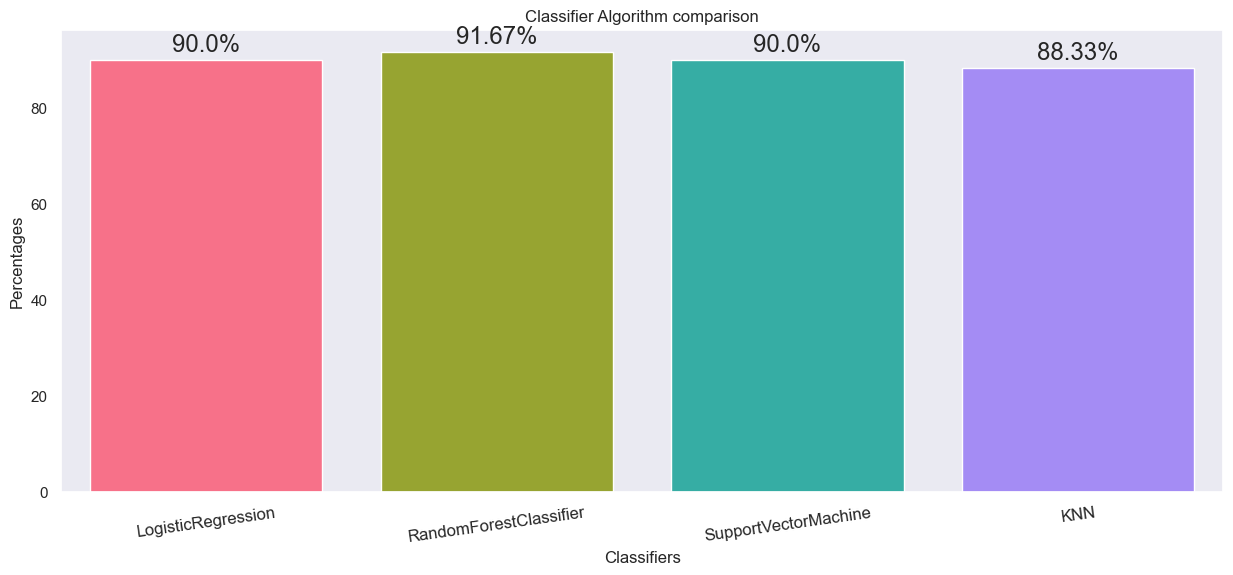

In [59]:
models = ['LogisticRegression','RandomForestClassifier','SupportVectorMachine','KNN']
plt.figure(figsize=(15,6))
ax=sns.barplot(x=models, y=accuracy_list, palette = "husl", saturation =2.0)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.xlabel("Classifiers")
plt.ylabel("Percentages")
plt.title("Classifier Algorithm comparison")
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()
plt.show()